# Introduction

This lab demonstrates how to use scikit-learn to recognize images of hand-written digits from 0-9.

# Import Libraries

First, we need to import the necessary libraries. We will use **matplotlib** for visualization, **datasets** and **metrics** from **sklearn** to load and evaluate the dataset, and **svm** for training the support vector machine.

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# Load and Visualize the Digits Dataset

We will load the digits dataset which consists of 8x8 pixel images of digits. We will use **imshow()** method from **matplotlib** to visualize the first 4 images along with their corresponding labels.

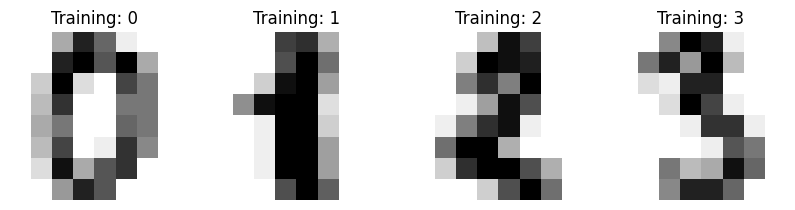

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

# Prepare the Dataset

We need to flatten the images to turn each 2-D array of grayscale values from shape **(8, 8)** into shape **(64,)**. This will give us a dataset of shape **(n_samples, n_features)**, where **n_samples** is the number of images and **n_features** is the total number of pixels in each image.

In [3]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split the Dataset

We will split the dataset into 50% train and 50% test subsets using **train_test_split()** method from sklearn.model_selection

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Train the Support Vector Machine

We will train a support vector classifier on the train samples using **svm.SVC()** method from **sklearn**

In [5]:
clf = svm.SVC(gamma=0.001)
clf.fit(X_train, y_train)

SVC(gamma=0.001)

# Predict and Evaluate the Model

We will use the trained model to predict the value of the digits for the samples in the test subset. Then, we will evaluate the model using **metrics.classification_report()** and **metrics.ConfusionMatrixDisplay.from_predictions()** methods from **sklearn.metrics**.

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [

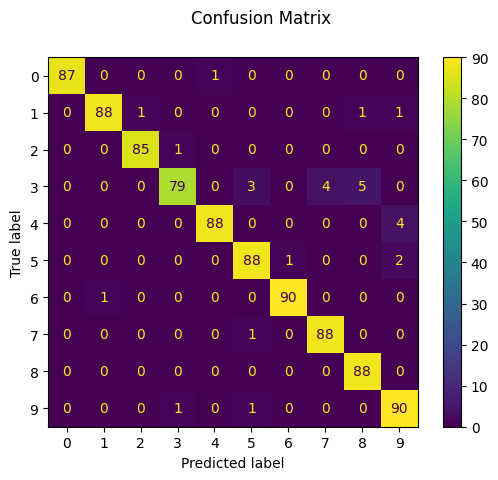

In [6]:
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

# Rebuild Classification Report from Confusion Matrix

If the results from evaluating a classifier are stored in the form of a confusion matrix and not in terms of **y_true** and **y_pred**, we can still build a classification report using **metrics.classification_report()** method as follows:

In [7]:
y_true = []
y_pred = []
cm = disp.confusion_matrix

for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




# Summary

In this lab, we learned how to use scikit-learn to recognize hand-written digits from 0-9 using support vector machine. We loaded and visualized the digits dataset, prepared and split the dataset, trained the model, predicted and evaluated the model using classification report and confusion matrix.